In [1]:
# Load the autoreload extension
%load_ext autoreload
# Enable autoreload for all modules (mode 2 is most comprehensive)
%autoreload 2

In [2]:
import ast
from temperament_functions import *
import time
import os
import json

In [3]:
INTERVAL_TYPES_ALL = {
    0: {"name": "P1", "targets": [0.0]},
    3: {"name": "m3", "targets": [315.64, 297.51, 294.13]},
    4: {"name": "M3", "targets": [386.31, 407.82]},
    5: {"name": "P4", "targets": [498.04]},
    7: {"name": "P5", "targets": [701.96]},
    8: {"name": "m6", "targets": [813.69, 792.18, 782.49]},
    9: {"name": "M6", "targets": [884.36, 905.87]},
    12: {"name": "P8", "targets": [1200.0]},

    1: {"name": "m2", "targets": [111.73, 104.96, 133.24, 92.18, 90.22, 70.67]},
    2: {"name": "M2", "targets": [203.91, 182.4]},
    6: {"name": "A4/d5", "targets": [590.22, 582.51, 617.49, 636.62, 563.38, 568.72, 631.28, 609.78]},
    10: {"name": "m7", "targets": [996.09, 1017.6]},
    11: {"name": "M7", "targets": [1088.27, 1066.76, 1109.78]},
}

RATIOS_REFERENCE_ALL = {
    0: ["1/1"],
    1: ["16/15", "17/16", "27/25", "135/128", "256/243", "25/24"],
    2: ["9/8", "10/9"],
    3: ["6/5", "19/16", "32/27"],
    4: ["5/4", "81/64"],
    5: ["4/3"],
    6: ["45/32", "7/5", "10/7", "13/9", "18/13", "25/18", "36/25", "64/45"],
    7: ["3/2"],
    8: ["8/5", "128/81", "11/7"],
    9: ["5/3", "27/16"],
    10: ["16/9", "9/5"],
    11: ["15/8", "50/27", "243/128"],
    12: ["2/1"]
}

INTERVAL_TYPES_FIVE_LIMIT = {
    0: {"name": "P1", "targets": [0.0]},
    3: {"name": "m3", "targets": [315.64]},
    4: {"name": "M3", "targets": [386.31]},
    5: {"name": "P4", "targets": [498.04]},
    7: {"name": "P5", "targets": [701.96]},
    8: {"name": "m6", "targets": [813.69]},
    9: {"name": "M6", "targets": [884.36]},

    1: {"name": "m2", "targets": [111.73]},
    2: {"name": "M2", "targets": [203.91]},
    6: {"name": "A4/d5", "targets": [590.22]},
    10: {"name": "m7", "targets": [996.09]},
    11: {"name": "M7", "targets": [1088.27]},
}

RATIOS_REFERENCE_FIVE_LIMIT = {
    0: ["1/1"],
    1: ["16/15"],
    2: ["9/8"],
    3: ["6/5"],
    4: ["5/4"],
    5: ["4/3"],
    6: ["45/32"],
    7: ["3/2"],
    8: ["8/5"],
    9: ["5/3"],
    10: ["16/9"],
    11: ["15/8"],
    12: ["2/1"]
}

In [4]:
# Uniform weights

def generate_uniform_interval_inventory(interval_types, total_weight=1.0):
    interval_data = []
    for note1 in range(12):
        for note2 in range(12):
            semitones = (note2 - note1) % 12
            interval_data.append(((note1, note2), interval_types[semitones]["targets"], total_weight / 144.0))
    
    return interval_data

uniform_interval_data_all_ratios = generate_uniform_interval_inventory(INTERVAL_TYPES_ALL)
uniform_interval_data_five_limit = generate_uniform_interval_inventory(INTERVAL_TYPES_FIVE_LIMIT)

In [ ]:
res = {}
results = compute_temperaments_ismir2025(
    {
        'uniform_interval_data_all_ratios': uniform_interval_data_all_ratios,
        'uniform_interval_data_five_limit': uniform_interval_data_five_limit
    },
    {
        "Unbounded Fifths": None,
        # "Fifths in (696-705)": (696, 705)
    },
    ['differential_evolution', 'dual_annealing', 'basinhopping'],
    overwriteResults=True,
    result=res,
    no_runs = 10,
    inherit_p = False,
    verbose = True,
    store_all_runs=True
)

In [ ]:
with open('results/results_uniform.json', 'w') as f:
    json.dump(results, f, indent=2)

In [7]:
for key, res in results.items():
    print(key)
    print(f" Best result: {round(res['best_result']['obj_val'],4)}")
    runtimes = [run['runtime'] for run in res["all_runs"]]
    losses = [run['obj_val'] for run in res["all_runs"]]
    print(f" Std.dev Loss: {np.std(losses)}") 
    print(f" Avg runtime: {np.average(runtimes)}")
    print(f" Std.dev runtime: {np.std(runtimes)}")

uniform_interval_data_all_ratios_Unbounded Fifths_differential_evolution
 Best result: 1.5571
 Std.dev Loss: 0.04210785332977215
 Avg runtime: 148.05803610000004
 Std.dev runtime: 38.23935392616891
uniform_interval_data_all_ratios_Unbounded Fifths_dual_annealing
 Best result: 1.5571
 Std.dev Loss: 1.8749430567638407e-05
 Avg runtime: 597.9156371
 Std.dev runtime: 112.32061196717022
uniform_interval_data_all_ratios_Unbounded Fifths_basinhopping
 Best result: 1.5726
 Std.dev Loss: 0.027174374626420996
 Avg runtime: 631.1576950000001
 Std.dev runtime: 10.570424974362455
uniform_interval_data_five_limit_Unbounded Fifths_differential_evolution
 Best result: 105.2283
 Std.dev Loss: 0.0
 Avg runtime: 26.553073499999847
 Std.dev runtime: 1.1574143131299297
uniform_interval_data_five_limit_Unbounded Fifths_dual_annealing
 Best result: 105.2283
 Std.dev Loss: 0.0
 Avg runtime: 172.44551339999998
 Std.dev runtime: 15.62803454995379
uniform_interval_data_five_limit_Unbounded Fifths_basinhopping
 B

In [ ]:
with open('results/results_uniform.json', 'r') as f:
    results = json.load(f)

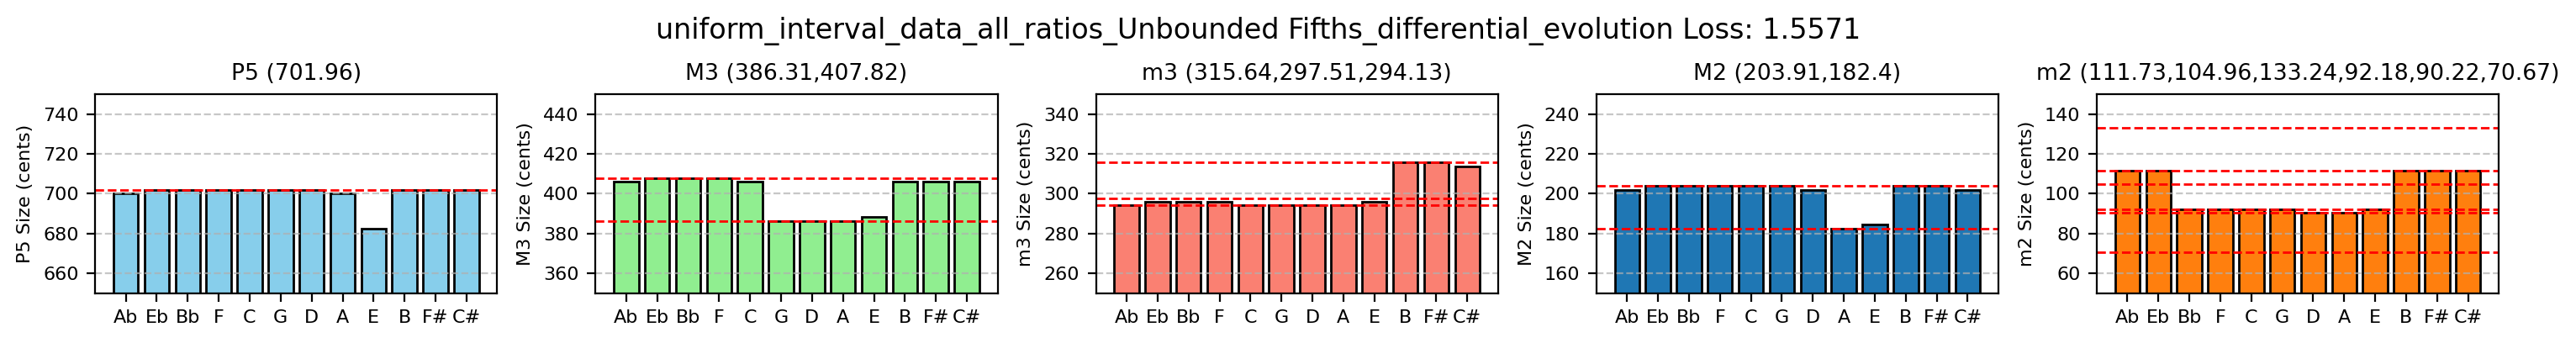

        P1      m2      M2      m3      M3      P4   A4-d5      P5      m6      M6      m7      M7 
C      0.00   92.18  203.91  294.14  405.87  498.05  590.23  701.96  794.14  905.87  996.09 1088.27
C#     0.00  111.73  201.96  313.69  405.87  498.05  609.78  701.96  813.69  903.91  996.09 1107.82
D      0.00   90.23  201.96  294.14  386.32  498.05  590.23  701.96  792.18  884.36  996.09 1088.27
Eb     0.00  111.73  203.91  296.09  407.82  500.00  611.73  701.95  794.13  905.86  998.04 1109.77
E      0.00   92.18  184.36  296.09  388.27  500.00  590.22  682.40  794.13  886.31  998.04 1088.27
F      0.00   92.18  203.91  296.09  407.82  498.04  590.22  701.95  794.13  905.86  996.09 1107.82
F#     0.00  111.73  203.91  315.64  405.86  498.04  609.77  701.95  813.68  903.91 1015.64 1107.82
G      0.00   92.18  203.91  294.13  386.31  498.04  590.22  701.95  792.18  903.91  996.09 1088.27
Ab     0.00  111.73  201.95  294.13  405.86  498.04  609.77  700.00  811.73  903.91  996.09 1107.82


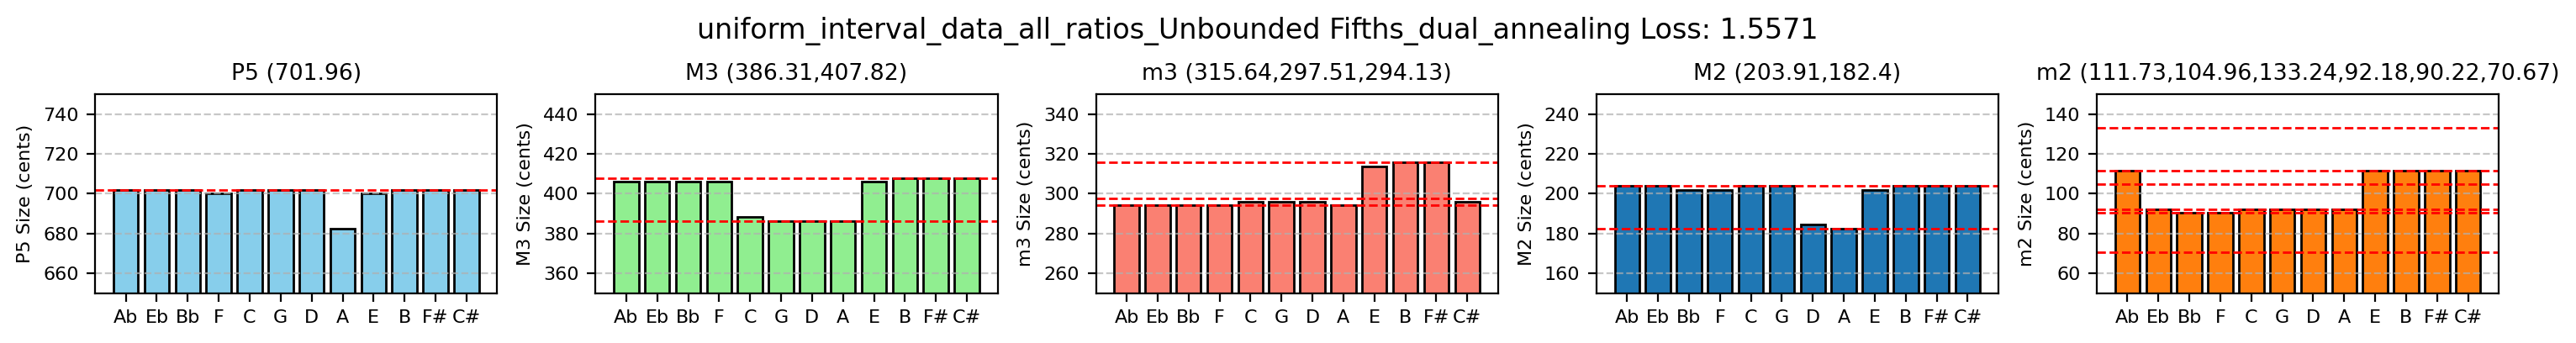

        P1      m2      M2      m3      M3      P4   A4-d5      P5      m6      M6      m7      M7 
C      0.00   92.18  203.91  296.09  388.27  500.00  590.23  701.96  794.14  905.87  998.05 1088.27
C#     0.00  111.73  203.91  296.09  407.82  498.05  609.78  701.96  813.69  905.87  996.09 1107.82
D      0.00   92.18  184.36  296.09  386.32  498.05  590.23  701.96  794.14  884.36  996.09 1088.27
Eb     0.00   92.18  203.91  294.14  405.87  498.05  609.78  701.96  792.18  903.91  996.09 1107.82
E      0.00  111.73  201.96  313.69  405.87  517.60  609.78  700.00  811.73  903.91 1015.64 1107.82
F      0.00   90.23  201.96  294.14  405.87  498.05  588.27  700.00  792.18  903.91  996.09 1088.27
F#     0.00  111.73  203.91  315.64  407.82  498.04  609.77  701.95  813.68  905.86  998.04 1109.77
G      0.00   92.18  203.91  296.09  386.31  498.04  590.22  701.95  794.13  886.31  998.04 1088.27
Ab     0.00  111.73  203.91  294.13  405.86  498.04  609.77  701.95  794.13  905.86  996.09 1107.82


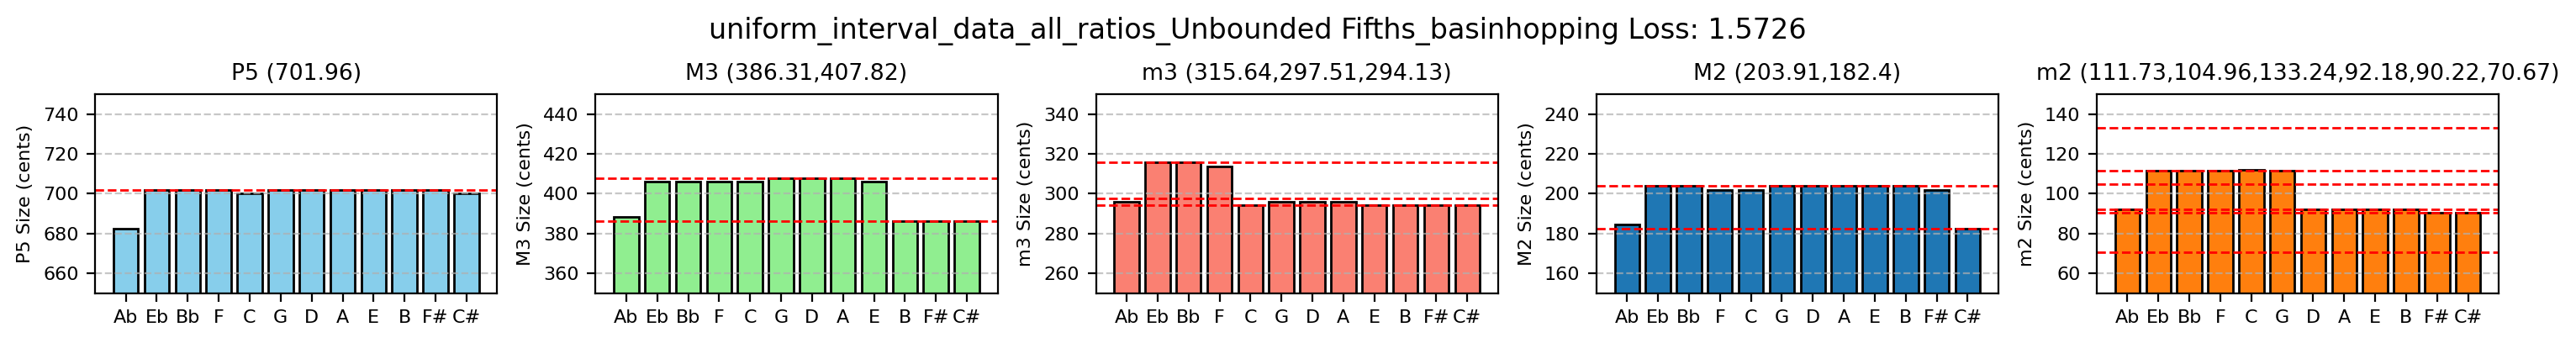

        P1      m2      M2      m3      M3      P4   A4-d5      P5      m6      M6      m7      M7 
C      0.00  111.75  201.99  294.15  405.88  498.06  609.79  700.03  811.76  903.94  996.10 1107.84
C#     0.00   90.24  182.40  294.13  386.31  498.04  588.28  700.01  792.19  884.35  996.09 1088.25
D      0.00   92.17  203.90  296.07  407.81  498.04  609.77  701.95  794.12  905.85  998.01 1109.76
Eb     0.00  111.73  203.91  315.64  405.88  517.61  609.79  701.95  813.69  905.85 1017.60 1107.83
E      0.00   92.18  203.91  294.15  405.88  498.06  590.22  701.96  794.12  905.87  996.10 1088.27
F      0.00  111.73  201.97  313.70  405.88  498.04  609.78  701.94  813.69  903.93  996.09 1107.82
F#     0.00   90.24  201.97  294.15  386.31  498.05  590.21  701.96  792.19  884.36  996.09 1088.27
G      0.00  111.73  203.91  296.07  407.81  499.97  611.72  701.96  794.12  905.85  998.03 1109.76
Ab     0.00   92.18  184.34  296.08  388.24  499.99  590.23  682.39  794.12  886.30  998.03 1088.27


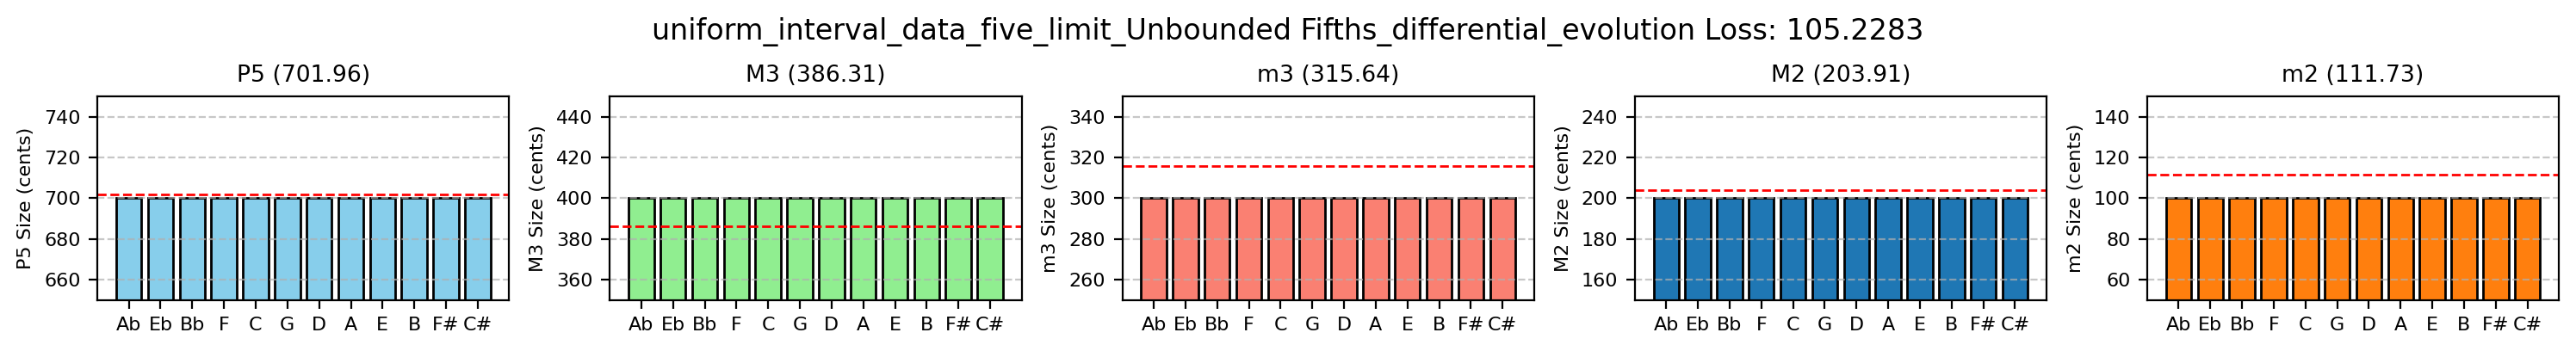

        P1      m2      M2      m3      M3      P4   A4-d5      P5      m6      M6      m7      M7 
C      0.00  100.00  200.00  300.00  400.00  500.00  600.00  700.00  800.00  900.00 1000.00 1100.00
C#     0.00  100.00  200.00  300.00  400.00  500.00  600.00  700.00  800.00  900.00 1000.00 1100.00
D      0.00  100.00  200.00  300.00  400.00  500.00  600.00  700.00  800.00  900.00 1000.00 1100.00
Eb     0.00  100.00  200.00  300.00  400.00  500.00  600.00  700.00  800.00  900.00 1000.00 1100.00
E      0.00  100.00  200.00  300.00  400.00  500.00  600.00  700.00  800.00  900.00 1000.00 1100.00
F      0.00  100.00  200.00  300.00  400.00  500.00  600.00  700.00  800.00  900.00 1000.00 1100.00
F#     0.00  100.00  200.00  300.00  400.00  500.00  600.00  700.00  800.00  900.00 1000.00 1100.00
G      0.00  100.00  200.00  300.00  400.00  500.00  600.00  700.00  800.00  900.00 1000.00 1100.00
Ab     0.00  100.00  200.00  300.00  400.00  500.00  600.00  700.00  800.00  900.00 1000.00 1100.00


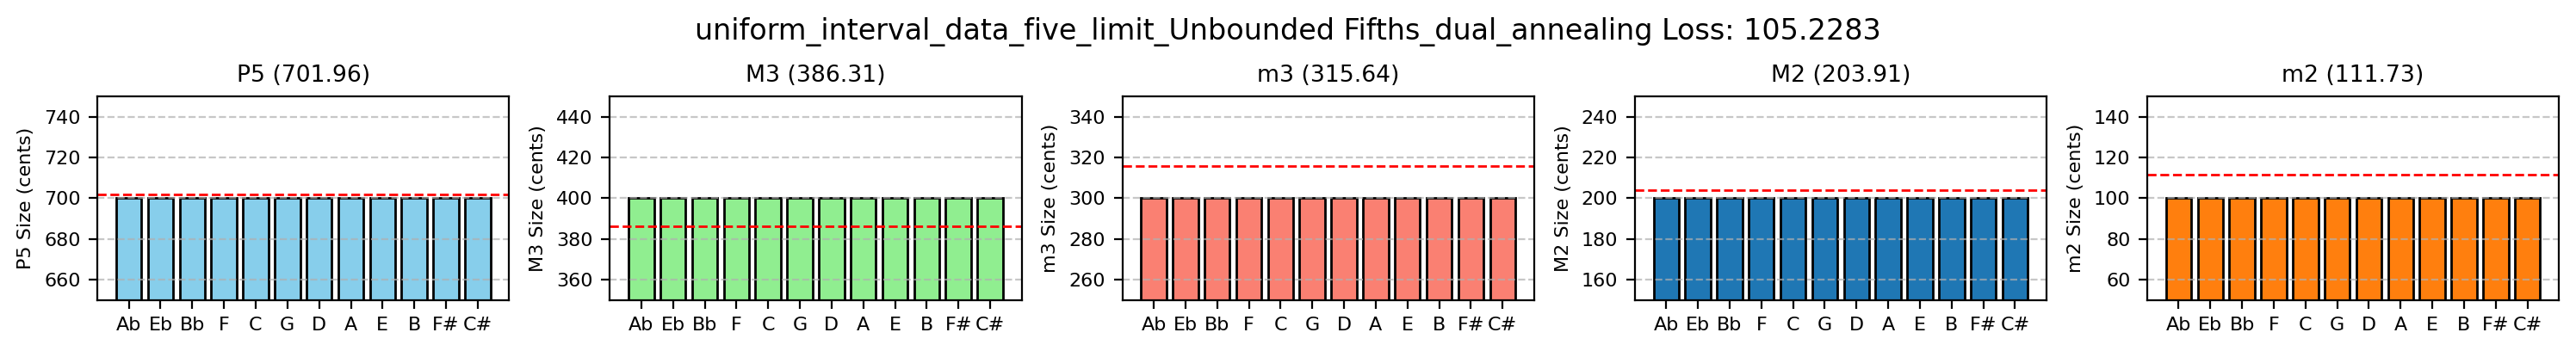

        P1      m2      M2      m3      M3      P4   A4-d5      P5      m6      M6      m7      M7 
C      0.00  100.00  200.00  300.00  400.00  500.00  600.00  700.00  800.00  900.00 1000.00 1100.00
C#     0.00  100.00  200.00  300.00  400.00  500.00  600.00  700.00  800.00  900.00 1000.00 1100.00
D      0.00  100.00  200.00  300.00  400.00  500.00  600.00  700.00  800.00  900.00 1000.00 1100.00
Eb     0.00  100.00  200.00  300.00  400.00  500.00  600.00  700.00  800.00  900.00 1000.00 1100.00
E      0.00  100.00  200.00  300.00  400.00  500.00  600.00  700.00  800.00  900.00 1000.00 1100.00
F      0.00  100.00  200.00  300.00  400.00  500.00  600.00  700.00  800.00  900.00 1000.00 1100.00
F#     0.00  100.00  200.00  300.00  400.00  500.00  600.00  700.00  800.00  900.00 1000.00 1100.00
G      0.00  100.00  200.00  300.00  400.00  500.00  600.00  700.00  800.00  900.00 1000.00 1100.00
Ab     0.00  100.00  200.00  300.00  400.00  500.00  600.00  700.00  800.00  900.00 1000.00 1100.00


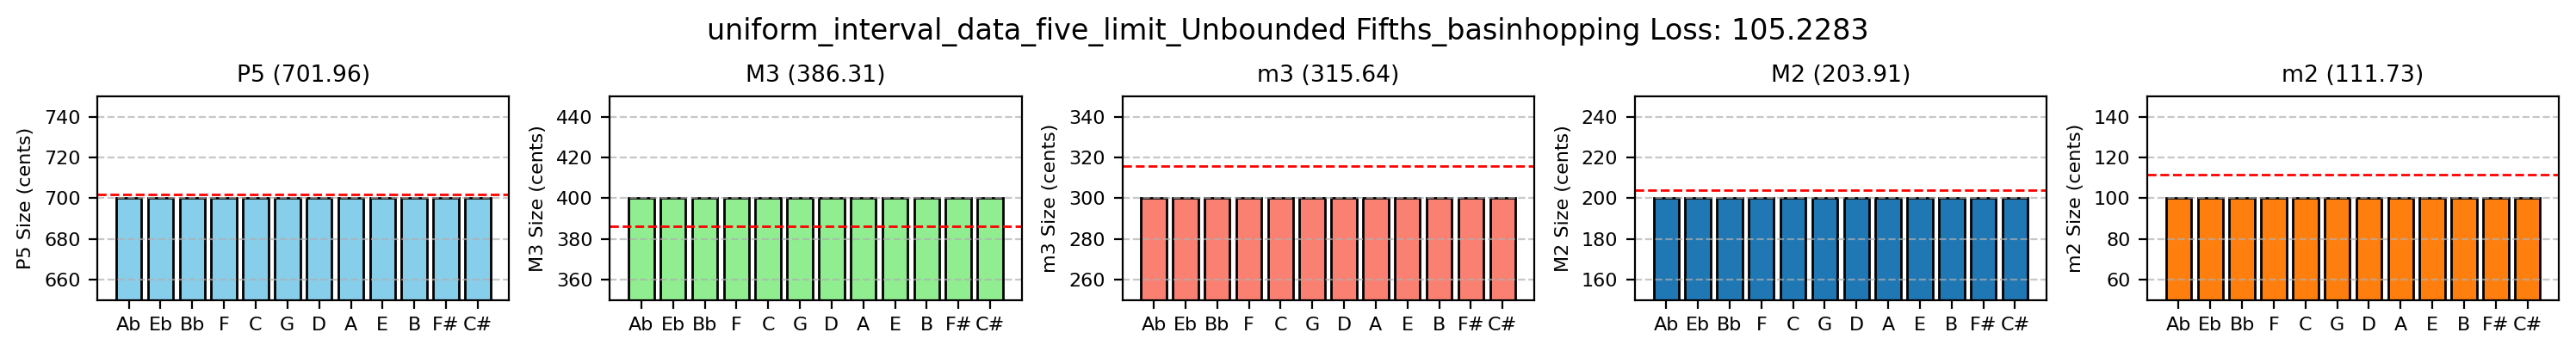

        P1      m2      M2      m3      M3      P4   A4-d5      P5      m6      M6      m7      M7 
C      0.00  100.00  200.00  300.00  400.00  500.00  600.00  700.00  800.00  900.00 1000.00 1100.00
C#     0.00  100.00  200.00  300.00  400.00  500.00  600.00  700.00  800.00  900.00 1000.00 1100.00
D      0.00  100.00  200.00  300.00  400.00  500.00  600.00  700.00  800.00  900.00 1000.00 1100.00
Eb     0.00  100.00  200.00  300.00  400.00  500.00  600.00  700.00  800.00  900.00 1000.00 1100.00
E      0.00  100.00  200.00  300.00  400.00  500.00  600.00  700.00  800.00  900.00 1000.00 1100.00
F      0.00  100.00  200.00  300.00  400.00  500.00  600.00  700.00  800.00  900.00 1000.00 1100.00
F#     0.00  100.00  200.00  300.00  400.00  500.00  600.00  700.00  800.00  900.00 1000.00 1100.00
G      0.00  100.00  200.00  300.00  400.00  500.00  600.00  700.00  800.00  900.00 1000.00 1100.00
Ab     0.00  100.00  200.00  300.00  400.00  500.00  600.00  700.00  800.00  900.00 1000.00 1100.00


In [8]:
for key, res in results.items():
    tuning = res['best_result']['tuning']
    if 'all_ratios' in key:
        interval_types = INTERVAL_TYPES_ALL
    elif 'five_limit' in key:
        interval_types = INTERVAL_TYPES_FIVE_LIMIT
    else:
        interval_types = None
    plotBie(
        tuning,
        key + f" Loss: {round(res['best_result']['obj_val'],4)}",
        intervals=[7,4,3,2,1],
        saveplot=True,
        filename=key + '.pdf',
        orientation='horizontal',
        interval_types=interval_types
    )
    printIntervalSizes(
        computeIntervalSizes(
            tuning
        )
    )

In [13]:
SCALA_CENT_PATH = './scl_cents'
scala_cent_fnmames = sorted([os.path.join(SCALA_CENT_PATH, f) for f in os.listdir(SCALA_CENT_PATH) if f.endswith('.txt')])
historic_tunings = {}
for fn in scala_cent_fnmames:
    tuning_name = os.path.splitext(os.path.basename(fn))[0]
    with open(fn, 'r') as f:
        cents_list = f.readline().strip()
        historic_tunings[tuning_name] = [0.0] + json.loads(cents_list) + [1200.0]

In [10]:
results_hist = {}
for tuning_name in historic_tunings.keys():
    compute_obj_val_ismir2025(
    {
        'uniform_interval_data_all_ratios': uniform_interval_data_all_ratios,
        'uniform_interval_data_five_limit': uniform_interval_data_five_limit
    },
    {
        "Unbounded Fifths": None,
        "Fifths in (696-705)": (696, 705)
    },
        p_in=historic_tunings[tuning_name],
        p_name=tuning_name,
        results=results_hist,
        verbose = True,
        verbose_procedure=False,
        verbose_optimizer=False,
        verbose_objective=False,
    )

In [11]:
historic_sorted = {}
for conf in [
    'all_ratios_Unbounded Fifths',
    'all_ratios_Fifths in (696-705)',
    'five_limit_Unbounded Fifths',
    'five_limit_Fifths in (696-705)',
]:
    historic_sorted[conf] = sorted([t for key, t in results_hist.items() if t['obj_val'] != np.inf and conf in key], key=lambda x: x['obj_val'])

In [12]:
for conf in [
    'all_ratios_Unbounded Fifths',
    'all_ratios_Fifths in (696-705)',
    'five_limit_Unbounded Fifths',
    'five_limit_Fifths in (696-705)',
]:
    print(f"--------- {conf} ---------")
    for t in historic_sorted[conf][:20]:
        print(f"{t['name']}\t{round(t['obj_val'],4)}")
    print()


--------- all_ratios_Unbounded Fifths ---------
ramis	1.6523
schiassi	1.7727
erlangen2	1.7727
erlangen	1.8428
marpurg-t1	2.0548
kirnberger1	2.0552
agricola	2.0552
indian-vina3	2.4726
meanschis	2.6703
meanschis7	2.6749
meansabat	2.9089
raintree	3.174
duoden12	3.8309
dudon_coherent_shrutis	3.8823
velde_ji	4.0092
mistyschism	4.446
chin_lu2	4.929
zwolle	4.929
pyth_12	4.929
pipedum_12l	5.4745

--------- all_ratios_Fifths in (696-705) ---------
kelletat	14.7618
kelletat1	14.7618
sorge1	15.8017
dudon_comptine_h3	15.8088
dudon_comptine	15.8745
scottd1	16.1762
sparschuh-2009well885Hz	16.2255
neidhardt-s2	16.5086
secor12_2	16.7014
sparschuh-442widefrench5th-a	16.8679
smithgw_well1	17.0864
prinz	17.4898
secor_wtpb-24c	17.5539
sparschuh-pc	17.7032
miller_bug	17.7163
kirnberger3s	17.7934
kirnberger	17.8212
secor5_23wt	17.8571
neidhardt-s3	17.8584
dudon_skisni_hwt	17.9564

--------- five_limit_Unbounded Fifths ---------
equal	105.2283
neidhardt4	105.2283
hanfling-bumler	105.2284
atomschis	105.2284
e